# Descrição do banco de dados

O banco de dados [bank.zip](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip) possui as seguintes caracterísicas:

* Área: Negócios;
* Número de atributos: 17;
* Número de amostras: 45211;
* Tipos de variáveis: categórica, binária e inteiro;

O banco de dados está relacionado a uma capanha de marketing, baseada em ligações, de um banco português. Os atributos do banco de dados incluem dados pessoais dos clientes do banco como:

* Idade - *inteiro*;
* Trabalho - *categórica*;
* Estado civil - *categórica*;
* Escolaridade - *categórica*;
* Dívidas - *categórica*;
* Empréstimo imobiliário - *categórica*;
* Empréstimo - *categórica*.

Além desses dados, tem-se também os dados e resultados da campanha de marketing atual como:

* Forma de contato - *categórica*;
* Mês do último contato - *categórica*;
* Dia da semana do contato - *categórica*;
* Duração da ligação - *inteiro*;
* Número de contatos - *inteiro*;
* Intervalo do contato entre campanhas - *inteiro*;
* Resultado da capanha - *binária*.

Por fim, tem-se duas informações da camapanha anterior como:

* Resultado da capanha - *categórica*;
* Número de contatos - *inteiro*.


# Questões

O desafio proposto é composto por 6 questões. Os códigos utilizados para o obter o resultados de cada questão são apresentados juntamente com as questões. 

## Obtendo e organizando o banco de dados

Antes do desenvolvimento das questões é necessário importar as bibliotecas relevantes, baixar, organizar e preprocessar os dados para fazer as análises, estes procedimentos são executados abaixo.

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import urllib.request as ur
import matplotlib.pyplot as plt
import sklearn.feature_selection as fs
from zipfile import ZipFile


# Especificações do banco de dados.
url = \
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
dataset = 'bank-full.csv'

# Armazenamento do banco de dados
path_ext = 'data'
file = 'data.zip'

path_data = os.path.relpath(os.getcwd())
path_data = os.path.join(path_data, path_ext)
path_file = os.path.join(path_data, file)

if not os.path.exists(path_data):
    os.mkdir(path_data)

ur.urlretrieve(url, path_file)
with ZipFile(path_file) as zfile:
    zfile.extractall(path_data)

# Importar o banco de dados como um Dataframe Pandas
df = pd.read_csv(os.path.join(path_data, dataset), ';')

if df.isnull().values.any():
    print('Removendo linhas com NaN.')
    df = df.dropna()

# Converte as colunas do tipo 'object' para 'categorical'
df_obj = df.select_dtypes(include=['object'])
for col in df_obj.columns:
    df[col] = df[col].astype('category')

## Questão 1

Questão: *Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?*

Nesta questão foi considerado como empréstimo tanto o empréstimo imobiliário quanto o empréstimo. Primeiramente, obteve-se o percentual de pessoas que têm qualquer tipo de empréstimo por profissão. Este resultado é apresentdo no gráfico abaixo.

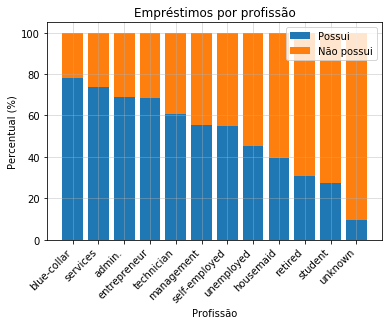

In [2]:
# Colunas para análise
cols = ['housing', 'loan']

# Obtêm-se a ocorrências de empréstimo por profissão
msk = (df[cols] == 'yes').sum(axis=1) > 0
loan_y = df['job'][msk]
loan_n = df['job'][~msk]

jobs = df['job'].value_counts()
loan_y = loan_y.value_counts()
loan_n = loan_n.value_counts()

# Normaliza-se os dados
idx = jobs.index
loan_yn = loan_y[idx] / jobs
loan_nn = loan_n[idx] / jobs

# Organiza-se os dados
loan_yn = loan_yn.sort_values(ascending=False)*100
idx = loan_yn.index
loan_nn = loan_nn[idx]*100

loan_y = loan_y[idx]
loan_n = loan_n[idx]

# Gera-se o gráfico
plt.bar(loan_yn.index, loan_yn)
plt.bar(loan_nn.index, loan_nn, bottom=loan_yn)
plt.grid(True, alpha=0.5)
plt.legend(['Possui', 'Não possui'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Profissão')
plt.ylabel('Percentual (%)')
plt.title('Empréstimos por profissão')
plt.show()

Como pode-se observar a profissão que tem a maior tendência em fazer empréstimo são profissionais colarinho azul (blue-collar). Destes profissionais cerca de 78% possui algum tipo de empréstimo. 

Por fim, obtêm-se o número de empréstimos de cada tipo dessa profissão.

In [3]:
# Obtêm-se o número de cada tipo de empréstimo por profissão
loan_h = df['job'][df['housing'] == 'yes'].value_counts()
loan_l = df['job'][df['loan'] == 'yes'].value_counts()

print('Número de empréstimos:')
print( 'Imobiliário: {}'.format(loan_h[idx[0]]))
print( 'Empréstimo: {}'.format(loan_l[idx[0]]))

Número de empréstimos:
Imobiliário: 7048
Empréstimo: 1684


Dessa forma, temos que essa profissão tem tendência a fazer empréstimos imobiliários.

## Questão 2

Questão: *Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?*

Nesta questão foi considerado o número de contatos e o sucesso da campanha atual. O sucesso neste caso foi considerado quando o cliente assina o termo de adesão. Assim, para verificar se há uma relação entre o número de contato e o sucesso na campanha, foi gerado um gráfico de barras onde mostra o percentual do sucesso e insucesso para cada número de ligações. O gráfico é mostrado abaixo.

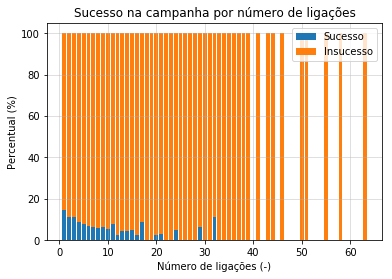

In [4]:
# Obtêm-se o sucesso e o insucesso da campanha por número
# de ligações
success = df[df['y'] == 'yes']['campaign']
fail = df[df['y'] == 'no']['campaign']

n = df['campaign'].value_counts()
success = success.value_counts()
fail = fail.value_counts()

# Normaliza-se os dados
idx = n.index.sort_values()
n = n[idx]
success_n = success.reindex(idx, fill_value=0) / n
fail_n = fail.reindex(idx, fill_value=0) / n

success_n *= 100
fail_n *= 100

# Gera-se o gráfico
plt.bar(success_n.index, success_n)
plt.bar(fail_n.index, fail_n, bottom=success_n)
plt.grid(True, alpha=0.5)
plt.legend(['Sucesso', 'Insucesso'])
plt.xlabel('Número de ligações (-)')
plt.ylabel('Percentual (%)')
plt.title('Sucesso na campanha por número de ligações')
plt.show()

Como pode-se observar, de forma geral o percentual reduz a medida que o número de ligações aumenta. Além disso, observa-se também um aumento do sucesso a medida que o número de contato aumenta acima de 20 ligações. Contudo, nestes casos há apenas uma amostra que resultou em sucesso para cada caso. Portanto, devido ao número de amostragem, para esses casos não é possível afirmar com certeza se essa tendência se repetiriria caso houvesse um maior número de amostras.

Além disso, observa-se pelo percentual de insucesso que de forma geral não houve sucesso nos casos em que o número de contato superou 18 ligações. Portanto, não justificaria continuar entrando em contato acima desse número de ligações.

## Questão 3

Questão: *Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?*

Como análise incial foi feita o histograma cumulativo, apresentado abaixo, entre o número de contatos e o sucesso da campanha. Além disso, também é mostrado o número médio de ligações.

Número médio de ligações: 2.14


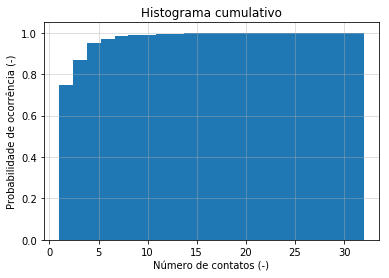

In [5]:
# Obtêm-se o sucesso campanha por número de ligações
contact = df[df['y'] == 'yes']['campaign']
contact_counts = contact.value_counts()

print('Número médio de ligações: {:.2f}'.format(contact.mean()))

# Gera-se o gráfico
plt.hist(contact, bins=contact_counts.shape[0],
         cumulative=True, density=1)
plt.grid(True, alpha=0.5)
plt.xlabel('Número de contatos (-)')
plt.ylabel('Probabilidade de ocorrência (-)')
plt.title('Histograma cumulativo')
plt.show()

Pode-se observar no histograma cumulativo que a maior parte dos casos que obtiveram sucesso tiveram um número de ligações inferior a 11 ligações, que corresponde a 99.11% dos casos. Portanto, indicaria o número máximo de 10 ligações. Já o número médio de ligações que recomendaria seria de 5 ligações, que corresponde a 95.21% dos casos de sucesso.

Contudo, para se obter um número de ligações ótimo, o ideal é que se tivesse ao menos o custo referente a cada ligação e se há uma duração da campanha. Assim, seria possível estimar mais precisamente qual seria o número de ligações ótimo. Uma vez que seria considerado o gasto e o retorno do possível cliente. Também, caso a campanha tenha uma duração limitada, o tempo gasto fazer múltiplas ligações para um mesmo cliente pode limitar o alcance da campanha, já que poderia-se estar ligando para outros clientes diferentes e obtendo a adesão destes.

## Questão 4

Questão: *O resultado da campanha anterior tem relevância na campanha atual?*

Para analisar se o resultado da campanha anterior tem alguma relevância na campanha atual, obteve-se os casos em que houve sucesso na campanha anterior e cotrastou-se com os casos que obteve-se sucesso na campanha atual. O resultado é mostrado no gráfico abaixo.

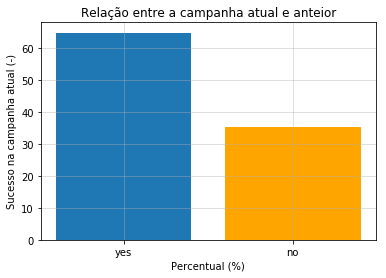

In [6]:
# Obtêm-se os casos que obtiveram sucesso na campanha anterior
success_y = df[df['poutcome'] == 'success']['y']
success_y = success_y.value_counts()

# Normaliza-se os dados
success_yn = success_y / success_y.sum()
success_yn *= 100

# Gera-se o gráfico
bar = plt.bar(success_yn.index, success_yn)
bar[1].set_color('orange')
plt.grid(True, alpha=0.5)
plt.xlabel('Percentual (%)')
plt.ylabel('Sucesso na campanha atual (-)')
plt.title('Relação entre a campanha atual e anteior')
plt.show()

Pode-se observar no gráfico acima que aproximadamente 65% dos casos em que obteve-se sucesso na campanha anterior também se obteve sucesso na campanha atual. Este resultado indica que há uma tendência entre clientes que aceitaram uma proposta no passado em aceitar uma nova no futuro. Este resultado portanto pode ser utilizado para otimizar as ligações em futuras campanhas, priorizando clientes que já aceitaram o serviço anteiormente.

## Questão 5

Questão: *Qual o fator determinante para que o banco exija um seguro de crédito?*

Para obter o fator que está mais relacionado a dívida do cliente e portanto exigir um seguro de crédito, foi selecionado apenas os dados pessoais do cliente. Assim, será possível obter uma característica mesmo se não houver dados do cliente referente a campanhas atuais ou anteriores.

Ao todo tem-se 7 dados pessoais dos clientes, portanto, para não ter que analisar cada dado separadamente, foi utilizado um *wrapper* que seleciona as características que apresenta os maiores valores *k*, com as funções de avaliação *ANOVA F-value* e *Mutual information*. Nesse caso foi escolhido apenas o maior valor.

In [7]:
# Seleciona-se os dados dos clientes
client_data = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'loan',
]

# Seleciona-se o dado desejado
target_col = ['default']

# Transforma as variáveis do tipo 'string' para 'inteiro'
X = df[client_data].apply(lambda x: (x.cat.codes if x.dtype.name
                                     is 'category' else x))
Y = df[target_col].apply(lambda x: (x.cat.codes if x.dtype.name
                                    is 'category' else x))

# Obtêm-se as duas melhores características de cada  função de avaliação
X_f_class = fs.SelectKBest(fs.f_classif, k=1).fit(X, Y[target_col[0]])
X_mutual = fs.SelectKBest(fs.mutual_info_classif, k=1).fit(X, Y[target_col[0]])

f_class = X.columns.values[X_f_class.get_support()][0]
mutual = X.columns.values[X_mutual.get_support()][0]

print('ANOVA F-value: {}'.format(f_class))
print('Mutual information: {}'.format(mutual))

ANOVA F-value: loan
Mutual information: balance


Apesar das funções de avaliações resultarem e características distintas, a segunda melhor caracterítica para a função *ANOVA F-value* foi também o saldo do cliente. Dessa forma, será analisado os dois casos separadamente.

Primeiramente para analisar se existe de fato uma relação, foi feito o teste de chi-quadrado para avaliar a indepêndencia dos casos em que o cliente tem dívida e também tem empréstimo.

In [8]:
# Seleciona-se dados referente ao empréstimo
col = 'loan'
x = df[col].value_counts()
y = df[col][df['default'] == 'yes'].value_counts()
z = df[col][df['default'] == 'no'].value_counts()

# Calcula-se o chi-quadrado
chi, p, = st.chisquare(y, y.sum() * x[y.index] / x.sum())
print('Chi-quadrado: {:.2f}'.format(chi))
print('P-valor: {:.4f}'.format(p))

Chi-quadrado: 264.83
P-valor: 0.0000


Como o P-valor obtido foi aproximadamente 0, temos que os casos são independente. Pode-se então avaliar a relação entre os clientes que possuem dívida e também empréstimo.

In [9]:
percent = (y / y.sum())*100
print('Possui empréstimo: {:.2f}%'.format(percent['yes']))
print('Não possui empréstimo: {:.2f}%'.format(percent['no']))

z = df['default'][df[col] == 'yes'].value_counts()
percent_d = (z / z.sum())*100
print('Possui empréstimo e tem dívida: {:.2f}%'.format(percent_d['yes']))

Possui empréstimo: 36.93%
Não possui empréstimo: 63.07%
Possui empréstimo e tem dívida: 4.16%


Observa-se que cerca de 37% dos clientes que possuem dívida também possuem empréstimo. Contudo, apenas aproximadamente 4% dos clientes que possuem empréstimo tem dívida. Portanto, a dívida não é um fator determinante. 

Para analisar o saldo do cliente foi feito um histograma do saldo dos clientes que possuem dívida e um outro para os que não possuem dívidas. Os histogramas são apresentados abaixo.

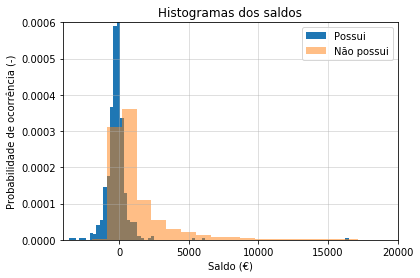

In [10]:
# Seleciona-se dados referente a profissão
col = 'balance'
yes = df[col][df['default'] == 'yes']
no = df[col][df['default'] == 'no']

# Gera-se o gráfico
plt.hist(yes, bins=100, density=True)
plt.hist(no, bins=100, density=True, alpha=0.5)
plt.ylim([0, 6e-4])
plt.xlim([-4057, 20000])
plt.grid(True, alpha=0.5)
plt.legend(['Possui', 'Não possui'])
plt.xlabel('Saldo (€)')
plt.ylabel('Probabilidade de ocorrência (-)')
plt.title('Histogramas dos saldos')
plt.show()

Pode-se observar nos histogramas acima, as distribuições dos saldos para os casos que possuem e não possuem dívida são diferentes. Onde no caso dos que possuem dívida a distribuição está mais deslocada para e esquerda, saldo negativo, do que os que não possuem, mais deslocada a direita, saldo positivo. Dessa forma tem-se que a mediana das distibuições são perceptivelmente diferentes. Além disso, de forma geral o saldo dos clientes que não possuem dívidas são maiores dos que possuem.

Como a mediana dos dois casos são sensivelmente diferentes, este pode ser um critério para se avaliar para exigir ou não um seguro de crédito. Abaixo, avalia-se caso este critério fosse usado.

In [11]:
print('Mediana do saldo dos que possuem dívida: €{}'.format(yes.median()))
print('Mediana do saldo dos que não possuem dívida: €{}'.format(no.median()))

lim = no.median()
percent_y = (np.sum(yes > lim) / yes.shape[0]) * 100
percent_n = (np.sum(no < lim) / no.shape[0]) * 100

text_y = 'Percentual dos que possuem dívida e saldo maior que'
text_n = 'Percentual dos que não possuem dívida e saldo menor que'
print(text_y + ' €{}: {:.2f}%'.format(lim, percent_y))
print(text_n + ' €{}: {:.2f}%'.format(lim, percent_n))

Mediana do saldo dos que possuem dívida: €-7.0
Mediana do saldo dos que não possuem dívida: €468.0
Percentual dos que possuem dívida e saldo maior que €468.0: 5.52%
Percentual dos que não possuem dívida e saldo menor que €468.0: 49.98%


Assim, tem-se que o saldo do cliente é um fator determinante para exigir o seguro de crédito.

## Questão 6

Questão: *Quais são as características mais proeminentes de um cliente que possua
empréstimo imobiliário?*

O metodologia para obter essas características é semelhante a descrita e utilizada na Questão 5. Ou seja, para não ter que analisar cada dado separadamente, foi utilizado o mesmo *wrapper* da Questão 5, com as mesmas funções de avaliação. Além disso, também foi usado teste de chi-quadrado para avaliar para avaliar a indepêndencia dos casos estudados.

De forma semelhante a Questão 5 foi selecionado apenas os dados pessoais do cliente para se obter uma característica que independe da campanha atual ou anteior. Assim, obtêm-se duas características utilizando o *wrapper* que serão avaliadas inicialmente.

In [12]:
# Seleciona-se os dados dos clientes
client_data = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'loan',
]

# Seleciona-se o dado desejado
target_col = ['housing']

# Transforma as variáveis do tipo 'string' para 'inteiro'
X = df[client_data].apply(lambda x: (x.cat.codes if x.dtype.name
                                     is 'category' else x))
Y = df[target_col].apply(lambda x: (x.cat.codes if x.dtype.name
                                    is 'category' else x))

# Obtêm-se as duas melhores características de cada  função de avaliação
X_f_class = fs.SelectKBest(fs.f_classif, k=1).fit(X, Y[target_col[0]])
X_mutual = fs.SelectKBest(fs.mutual_info_classif, k=1).fit(X, Y[target_col[0]])

f_class = X.columns.values[X_f_class.get_support()]
mutual = X.columns.values[X_mutual.get_support()]

print('ANOVA F-value: {}'.format(f_class[0]))
print('Mutual information: {}'.format(mutual[0]))

ANOVA F-value: age
Mutual information: job


Cada função de avaliação resultou em uma característica distinta que serão analisadas. Fez-se então o teste de independência chi-quadrado para profissão. Em seguida é mostrado em um gráfico de barras o percentual de cada profissão que possui e não possui um empréstimo imobiliário.

Chi-quadrado: 1593.98
P-valor: 0.0000


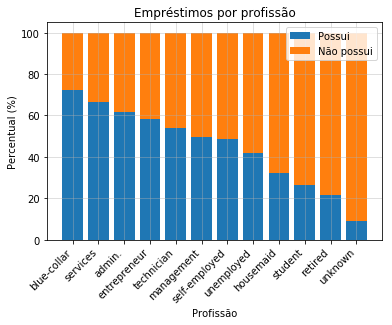

In [13]:
# Seleciona-se dados referente a profissão
col = 'job'
x = df[col].value_counts()
y = df[col][df['housing'] == 'yes'].value_counts()
z = df[col][df['housing'] == 'no'].value_counts()

# Calcula-se o chi-quadrado
chi, p, = st.chisquare(y, y.sum() * x[y.index] / x.sum())
print('Chi-quadrado: {:.2f}'.format(chi))
print('P-valor: {:.4f}'.format(p))

# Normaliza-se os dados
y_norm = (y / x[y.index]).sort_values(ascending=False)
z_norm = (z / x[z.index])[y_norm.index]

y_norm *= 100
z_norm *= 100

# Gera-se o gráfico
plt.bar(y_norm.index, y_norm)
plt.bar(z_norm.index, z_norm, bottom=y_norm)
plt.grid(True, alpha=0.5)
plt.legend(['Possui', 'Não possui'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Profissão')
plt.ylabel('Percentual (%)')
plt.title('Empréstimos por profissão')
plt.show()

Tem-se que o P-valor é próximo de 0, portanto tem-se que os casos são independentes. Como pode-se observar, a profissão que mais faz empréstimos imobiliários é de colarinho azul, seguida de serviços e administração. Tem-se também que aposentados estudantes e empregadas domésticas são os que possuem menor percentual de empréstimo imobiliário.

Já para o caso da idade das pessoas foi feito um histograma cumulativo para avaliar quais idades fazem mais empréstimo imobiliário. Em seguida é calculado a média de idade que possui e não possui empréstimo imobiliário.

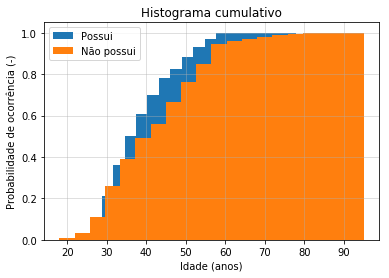

Idade média:
* Possui empréstimo: 39.18 anos
* Não possui empréstimo: 43.14 anos


In [14]:
# Seleciona-se dados referente a idade
col = 'age'
x = df[col]
yes = df[col][df['housing'] == 'yes']
no = df[col][df['housing'] == 'no']

# Gera-se o gráfico
plt.hist(yes, bins=20, density=True, cumulative=True)
plt.hist(no, bins=20, density=True, cumulative=True)
plt.grid(True, alpha=0.5)
plt.legend(['Possui', 'Não possui'])
plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de ocorrência (-)')
plt.title('Histograma cumulativo')
plt.show()

# Obtêm-se a idade média
print('Idade média:')
print('* Possui empréstimo: {:.2f} anos'.format(yes.mean()))
print('* Não possui empréstimo: {:.2f} anos'.format(no.mean()))

Observa-se no histograma cumulativo acima que pessoas mais jovens tendem a fazer mais empréstimo do que pessoas mais velhas, como evidenciado pelo cálculo da média dos dois casos. Além disso, observa-se no histograma cerca de 80% das pessoas que fazem empréstimo imobiliário têm idade inferior a 45 anos e cerca de 50% das pessoas têm idade inferior 34 anos.

Por fim, foi avaliado também uma tercerira característica, escolaridade, que apresentou uma ligeira diferença entre os casos que possui ou não um empréstimo imobiliário. Foi feito o mesmo procedimento utilizado no caso da profissão. Os resultados são apresentados abaixo.

Chi-quadrado: 285.99
P-valor: 0.0000


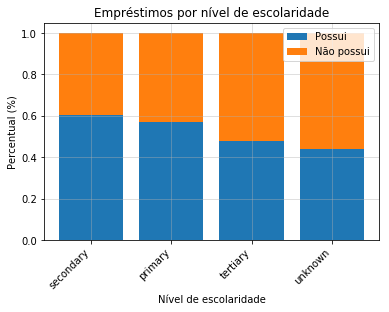

In [15]:
# Seleciona-se dados referente a escolaridade
col = 'education'
x = df[col].value_counts()
y = df[col][df['housing'] == 'yes'].value_counts()
z = df[col][df['housing'] == 'no'].value_counts()

# Calcula-se o chi-quadrado
chi, p, = st.chisquare(y, y.sum() * x[y.index] / x.sum())
print('Chi-quadrado: {:.2f}'.format(chi))
print('P-valor: {:.4f}'.format(p))

# Normaliza-se os dados
y_norm = (y / x[y.index]).sort_values(ascending=False)
z_norm = (z / x[z.index])[y_norm.index]

# Gera-se o gráfico
plt.bar(y_norm.index, y_norm)
plt.bar(z_norm.index, z_norm, bottom=y_norm)
plt.grid(True, alpha=0.5)
plt.legend(['Possui', 'Não possui'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nível de escolaridade')
plt.ylabel('Percentual (%)')
plt.title('Empréstimos por nível de escolaridade')
plt.show()

Tem-se que o P-valor é próximo de 0, portanto tem-se que os casos são independentes. Como pode-se observar no gráfico de barras, mais da metade das pessoas que não possuem graduação tem empréstimo imobiliário. Enquanto que cerca de 44% das pessoas com graduação possui.

Desssa forma, as características mais proeminente de um cliente que possui um empréstimo imobiliário é um cliente que não possui graduação tem uma idade inferior a 45 anos e tem uma profissão de colarinho azul.